# ENTENDENDO O PROBLEMA

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Problema:**
Uma empresa de telecomunicações deseja melhorar a retenção de clientes, reduzindo o número de cancelamentos de contrato. Eles querem entender quais são as principais razões pelas quais os clientes cancelam seus contratos e como eles podem identificar os clientes que estão em risco de cancelar.

**Informações do dataset:**

| Coluna | Descrição |
|--------|-----------|
| customerID | ID exclusivo de cada cliente |
| gender | Gênero do cliente (Masculino ou Feminino) |
| SeniorCitizen | Indica se o cliente é idoso (1) ou não (0) |
| Partner | Indica se o cliente tem um parceiro (Sim ou Não) |
| Dependents | Indica se o cliente tem dependentes (Sim ou Não) |
| tenure | Número de meses que o cliente permaneceu com a empresa |
| PhoneService | Indica se o cliente tem serviço de telefone (Sim ou Não) |
| MultipleLines | Indica se o cliente tem várias linhas telefônicas (Sim, Não ou Sem serviço telefônico) |
| InternetService | Tipo de serviço de internet do cliente (DSL, Fibra Óptica ou Sem serviço de internet) |
| OnlineSecurity | Indica se o cliente tem segurança online (Sim, Não ou Sem serviço de internet) |
| OnlineBackup | Indica se o cliente tem backup online (Sim, Não ou Sem serviço de internet) |
| DeviceProtection | Indica se o cliente tem proteção de dispositivo (Sim, Não ou Sem serviço de internet) |
| TechSupport | Indica se o cliente tem suporte técnico (Sim, Não ou Sem serviço de internet) |
| StreamingTV | Indica se o cliente tem serviço de TV por streaming (Sim, Não ou Sem serviço de internet) |
| StreamingMovies | Indica se o cliente tem serviço de filmes por streaming (Sim, Não ou Sem serviço de internet) |
| Contract | Tipo de contrato do cliente (Mensal, Dois anos ou Um ano) |
| PaperlessBilling | Indica se o cliente optou pela fatura eletrônica (Sim ou Não) |
| PaymentMethod | Método de pagamento do cliente (Cheque Eletrônico, Cartão de Crédito, Transferência Bancária (automática) ou Pagamento Eletrônico) |
| MonthlyCharges | Valor mensal cobrado do cliente |
| TotalCharges | Valor total cobrado do cliente |
| Churn | Indica se o cliente cancelou o contrato (Sim ou Não) |


# IMPORTS

In [54]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import warnings 

from scipy                 import stats  as ss
from sklearn.preprocessing import RobustScaler, MinMaxScaler

from matplotlib            import pyplot as plt
from IPython.core.display  import HTML

warnings.filterwarnings( 'ignore' )

## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    
    sns.set()
jupyter_settings()

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [3]:
df = pd.read_csv('../data/telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA DESCRIPTIONS

In [4]:
df2 = df.copy()

## Rename Columns

In [5]:
df2.columns = df2.columns.str.lower()

## Change Types


In [6]:
df2['totalcharges'] = df2['totalcharges'].apply(lambda x: '0' if x == ' ' else x)
df2['totalcharges'] = df2['totalcharges'].astype(float)

df2.drop(columns=['customerid'], inplace=True)

df2['seniorcitizen'] = df2['seniorcitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')

# varaivel reposta para 0 e 1.
df2['churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['churn'].replace(to_replace='No',  value=0, inplace=True)

# convetar o dataset para dummies
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,tenure,monthlycharges,totalcharges,churn,gender_Female,gender_Male,seniorcitizen_No,seniorcitizen_Yes,partner_No,partner_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Data Dimensions

In [7]:
print(f'number of rows: {df2.shape[0]}')
print(f'number of columns: {df2.shape[1]}')

number of rows: 7043
number of columns: 20


## Data Types

In [8]:
df2.dtypes

gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

## Check NA

In [9]:
df2.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Descriptive Statistical

In [10]:
num_attrs = df2.select_dtypes(include=['int64', 'int32',  'float64'])
cat_attrs = df2.select_dtypes(exclude=['int32', 'int64', 'float64', 'datetime64[ns]'])

## Numerical Attributes

In [11]:
# central tendency - mean, media
ct1 = pd.DataFrame(num_attrs.apply(np.mean)).T
ct2 = pd.DataFrame(num_attrs.apply(np.median)).T

# disperation - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attrs.apply(np.std)).T
d2 = pd.DataFrame(num_attrs.apply(min)).T
d3 = pd.DataFrame(num_attrs.apply(max)).T
d4 = pd.DataFrame(num_attrs.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attrs.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attrs.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attrs', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attrs,min,max,range,mean,median,std,skew,kurtosis
0,tenure,0.00,72.00,72.0,32.371149,29.00,24.557737,0.239540,-1.387372
1,monthlycharges,18.25,118.75,100.5,64.761692,70.35,30.087911,-0.220524,-1.257260
2,totalcharges,0.00,8684.80,8684.8,2279.734304,1394.55,2266.633539,0.963235,-0.228580
3,churn,0.00,1.00,1.0,0.265370,0.00,0.441530,1.063031,-0.870211


Minha variavel "tenure" está com um desvio padrão de 24, isso indica que meus dados estão muito espalhado em relação a minha média de 32. O desvio padrão está me indicando que meus dados não estão previsiveis e isso pode me atrapalhar na hora de prever ou tirar insights. Porém, isso me indica que alguns clientes permanecem por mais tempo e outros cancelam rapidamente.

## Categorical Attributes

In [12]:
# dicionario = {}

# for col1 in cat_attrs.columns:
#     lista_geral = []
#     for col2 in cat_attrs.columns:
#         lista_geral.append(cramer_v(cat_attrs[col1], cat_attrs[col2]))
#     dicionario[col1] = lista_geral
    
# d = pd.DataFrame(dicionario)
# sns.heatmap(d, annot=True);

# DATA ANALYSIS

In [13]:
df3 = df2.copy()

## Univariate Analysis


### Variavel Resposta

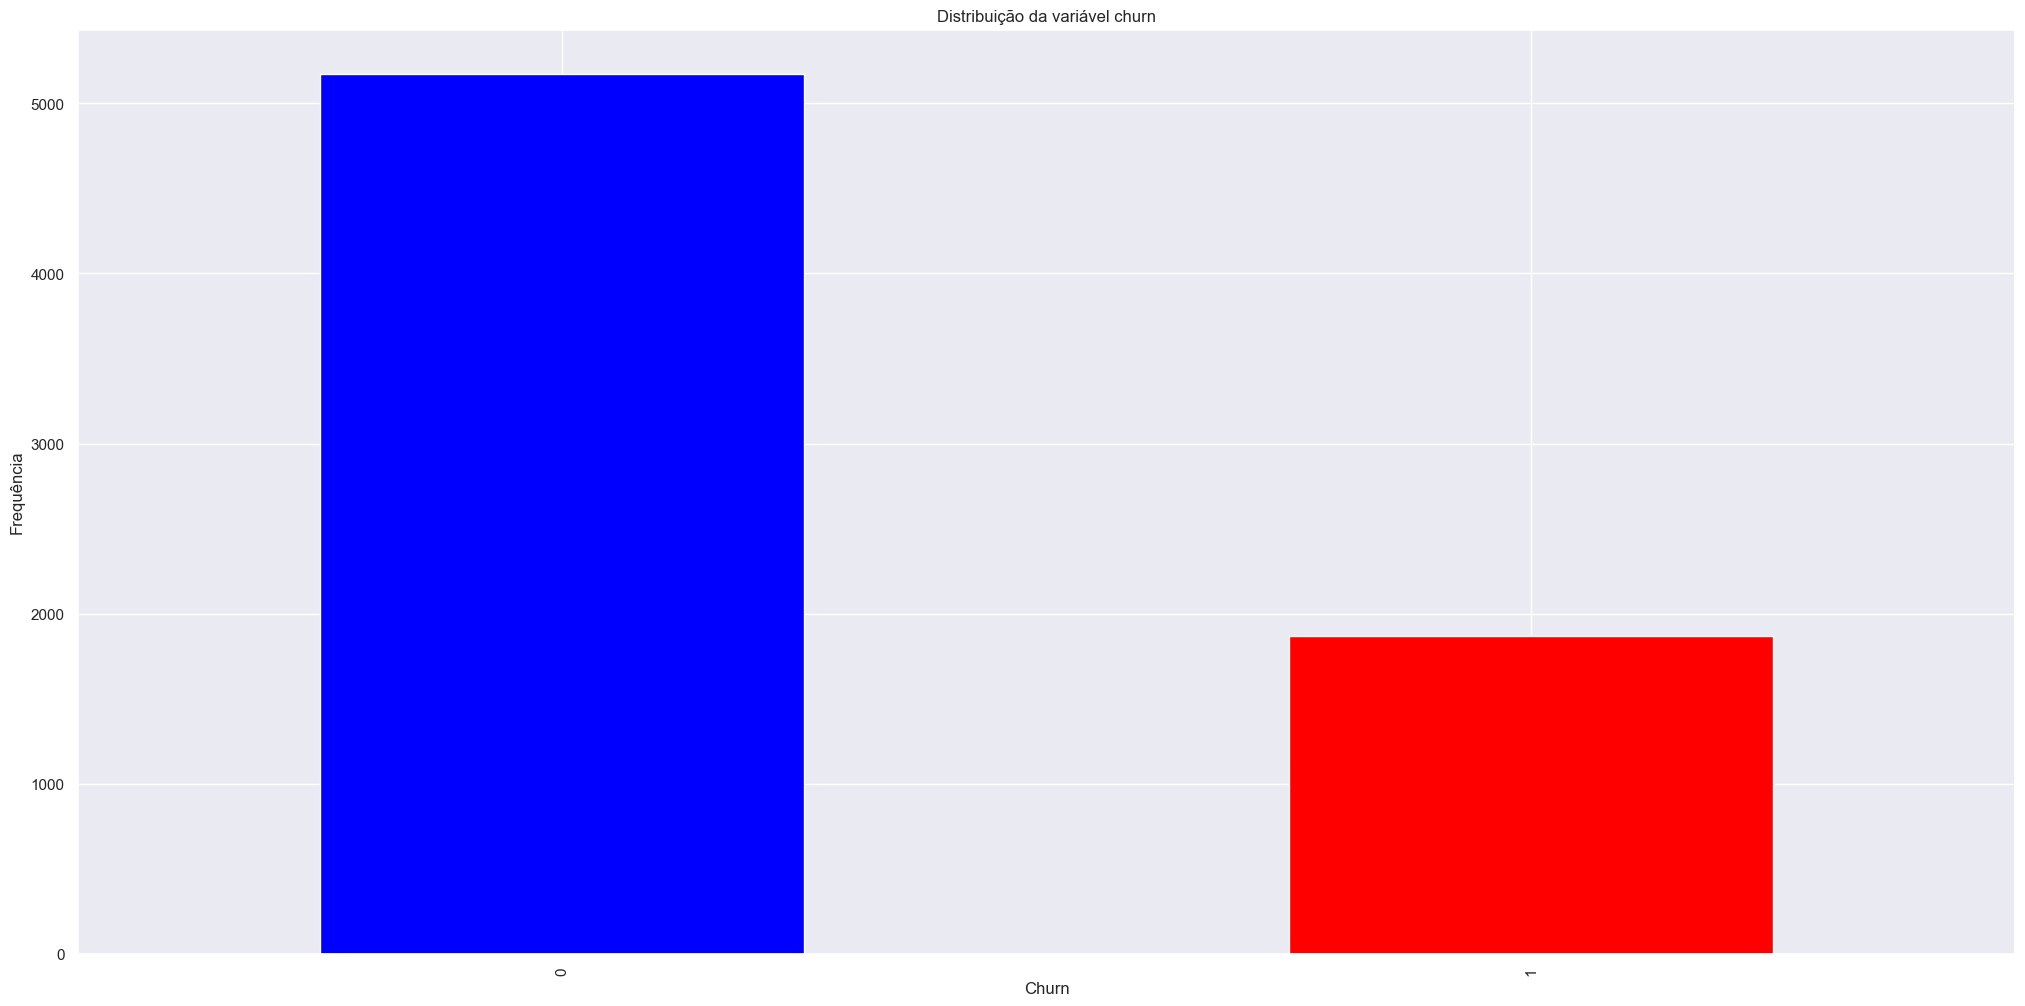

In [14]:
freq_table = df3['churn'].value_counts()

freq_table.plot(kind='bar', color=['blue', 'red']);
plt.title('Distribuição da variável churn')
plt.xlabel('Churn')
plt.ylabel('Frequência');


### Dados Demograficos

In [15]:
dados_demograficos = df3[['gender', 'seniorcitizen', 'partner', 'dependents']]

Male      50.47565
Female    49.52435


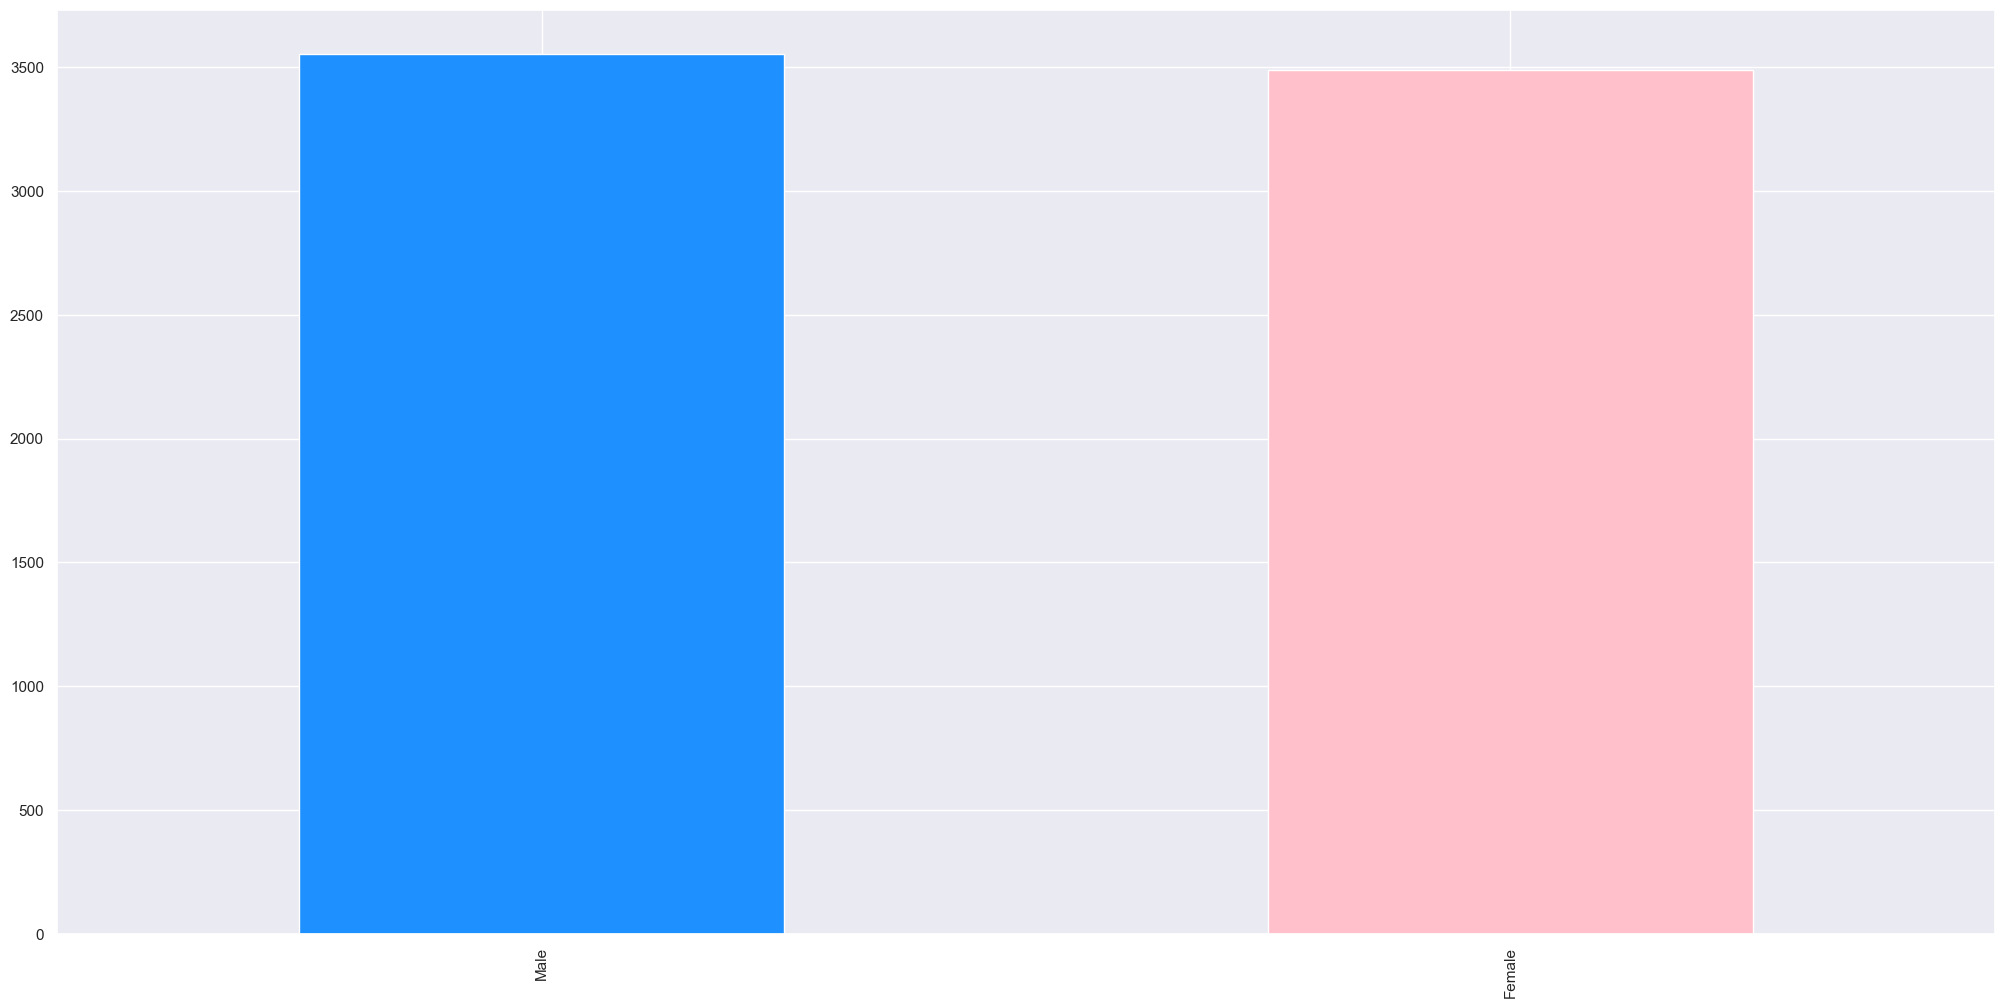

In [16]:
print((dados_demograficos['gender'].value_counts(normalize=True) * 100).to_string())
dados_demograficos['gender'].value_counts().plot(kind='bar', color=['dodgerblue', 'pink']); 

bem, essa variavel está bem distribuida. Talvez ela não seja tão útil para meu problema.

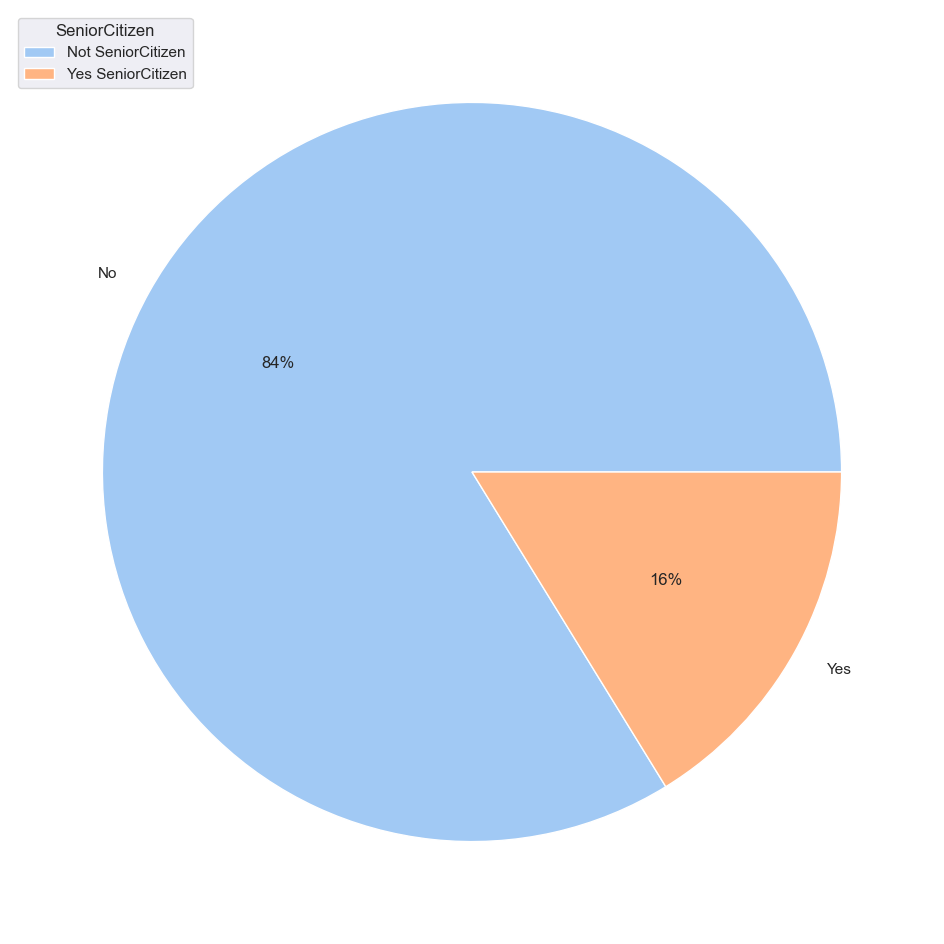

In [17]:
keys = dados_demograficos['seniorcitizen'].value_counts(normalize=True).index
data = dados_demograficos['seniorcitizen'].value_counts(normalize=True).values

palette_color = sns.color_palette('pastel')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%');
plt.legend(title='SeniorCitizen', loc='upper left', labels=['Not SeniorCitizen', 'Yes SeniorCitizen']);

Por mais que eu tente evitar os graficos de pizza, nesse exemplo acima ele se encaixou perfeitamente para nos observamos a distribuição da variavel que indica se o cliente é idoso ou não é.

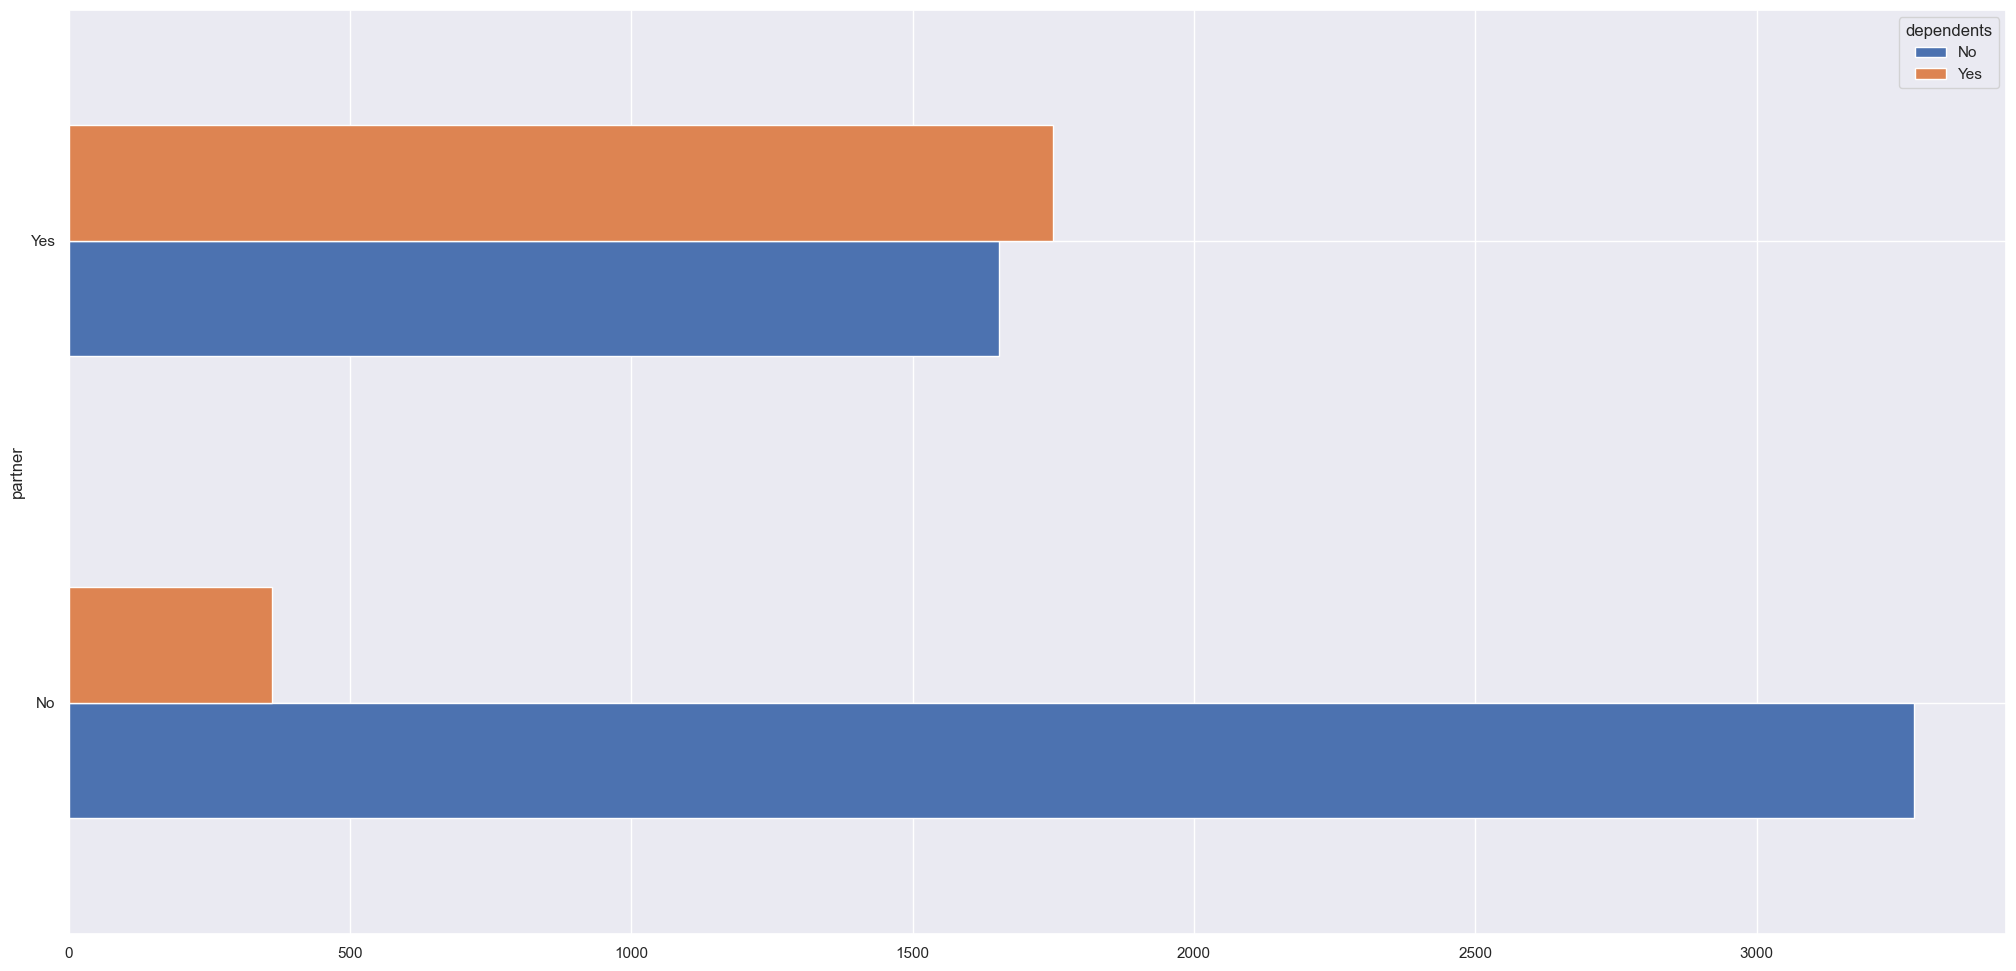

In [18]:
dados_demograficos.groupby(['partner', 'dependents']).size().unstack().plot(kind='barh');

Utilizei esse grafico pois estou lidando com variaveis categoricas e graficos na horizontal é melhor para leitura. Aqui observei os pais que possuem filhos ou depedentes ( geralmente financeiro ).

### Dados de serviços

In [19]:
servicos = df3[['phoneservice','multiplelines','internetservice','onlinesecurity',
           'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']]

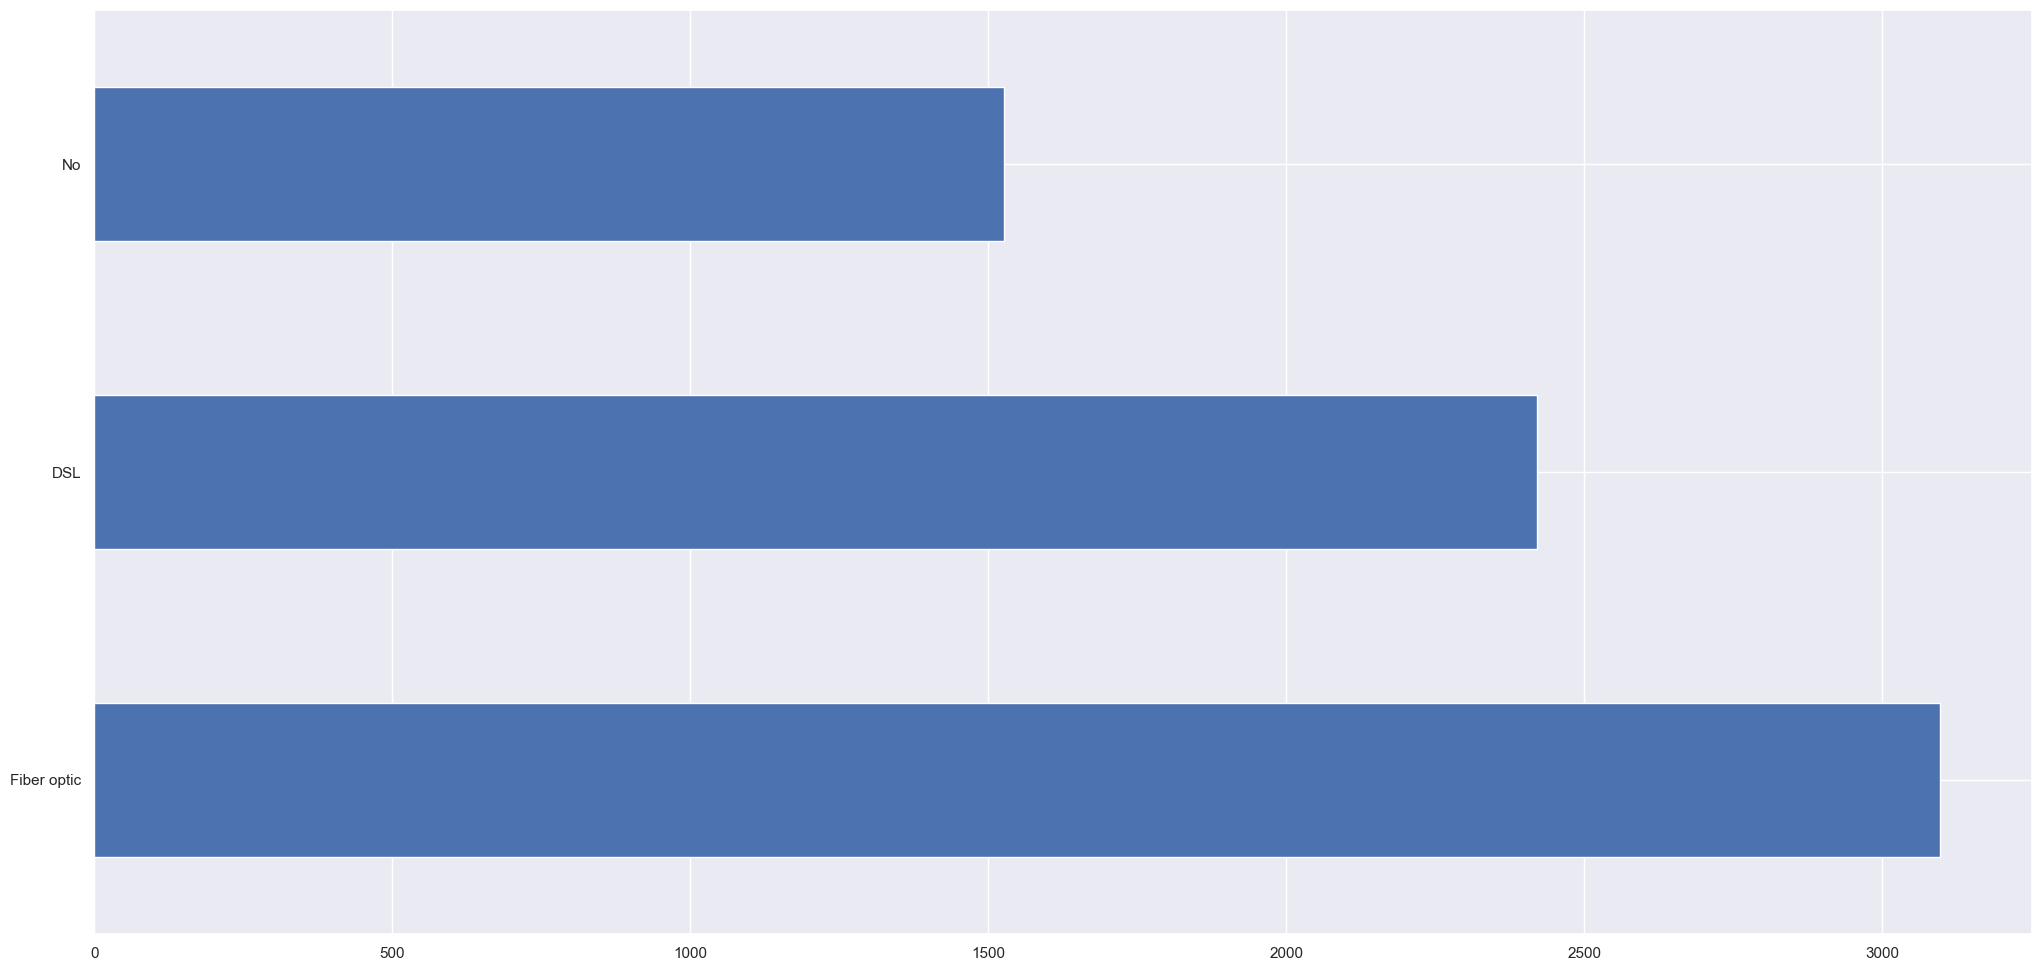

In [20]:
servicos['internetservice'].value_counts().plot(kind='barh');

A grande maioria usa o serviço de Fibra Optica, porem, mais de 1500 pessoas não tem serviço de internet, isso é interresante.

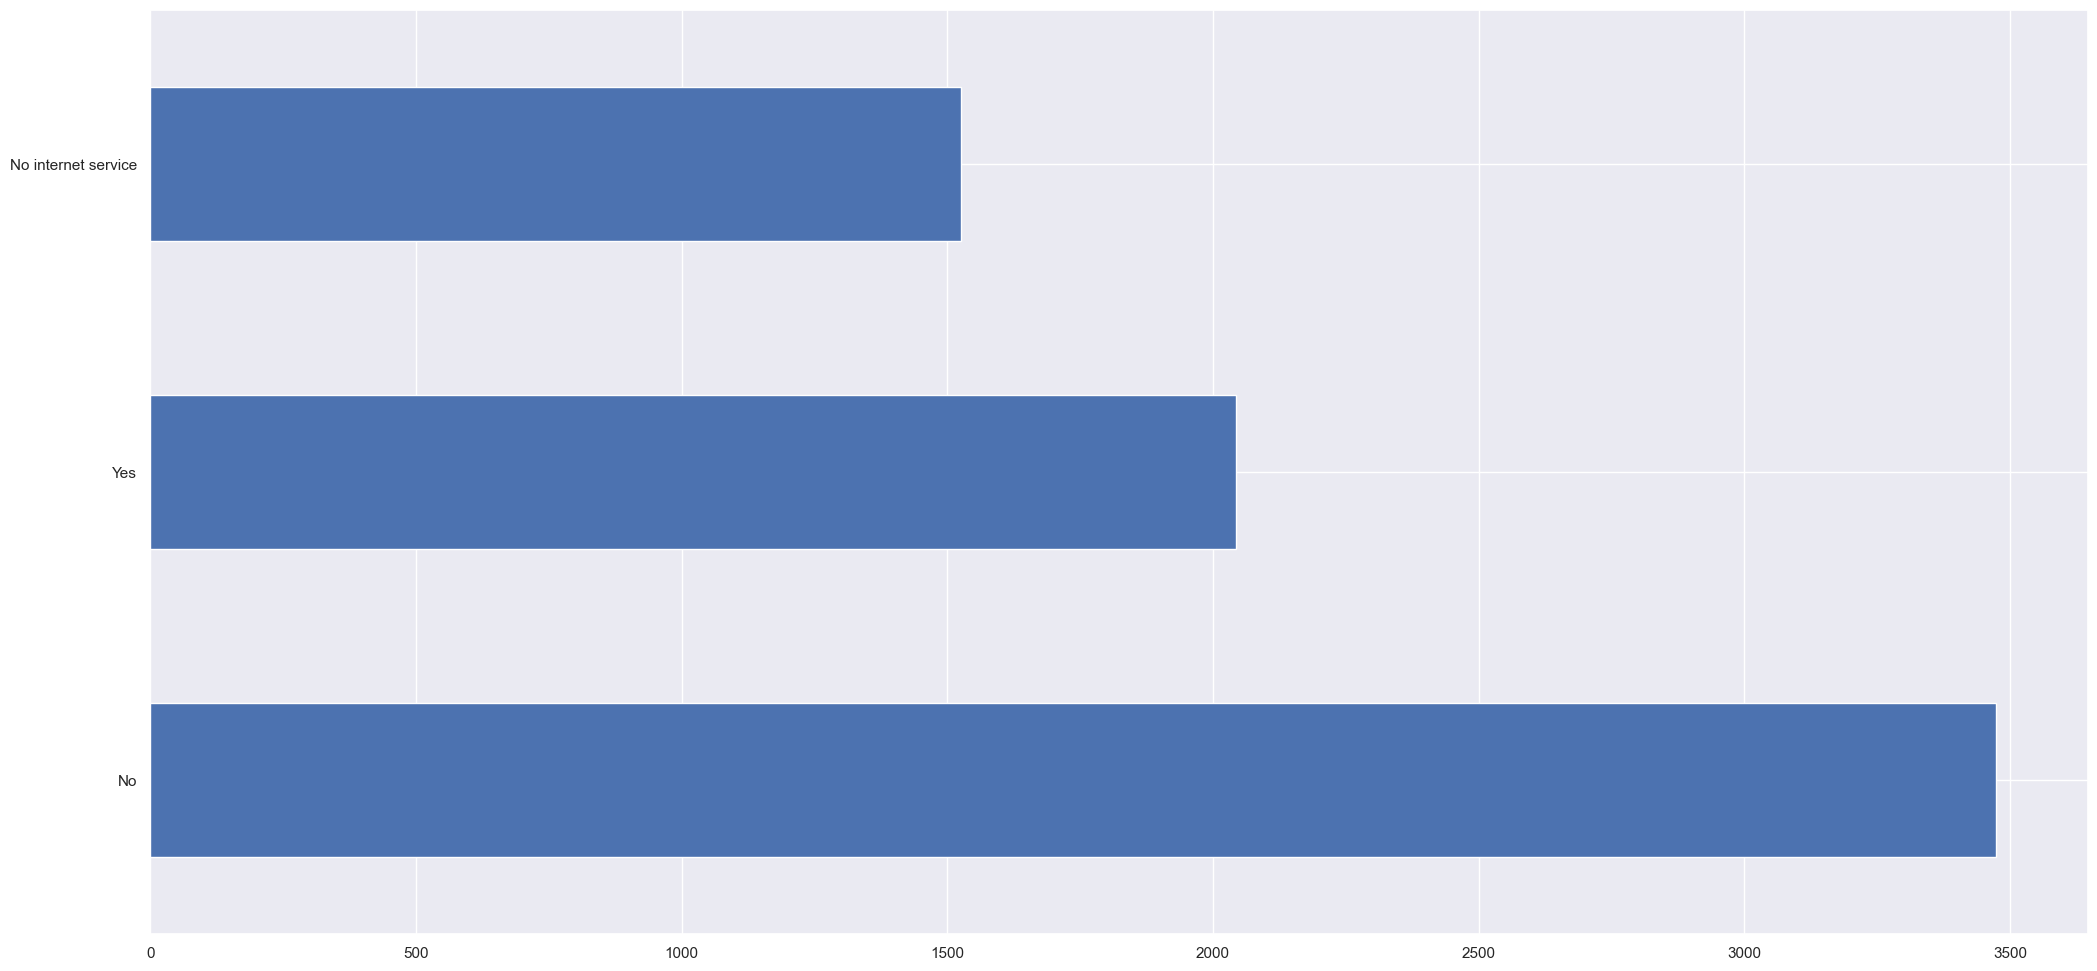

In [21]:
servicos['techsupport'].value_counts().plot(kind='barh');

A maioria dos clientes nao possuem suporte tecnico. Isso influencia no churn?

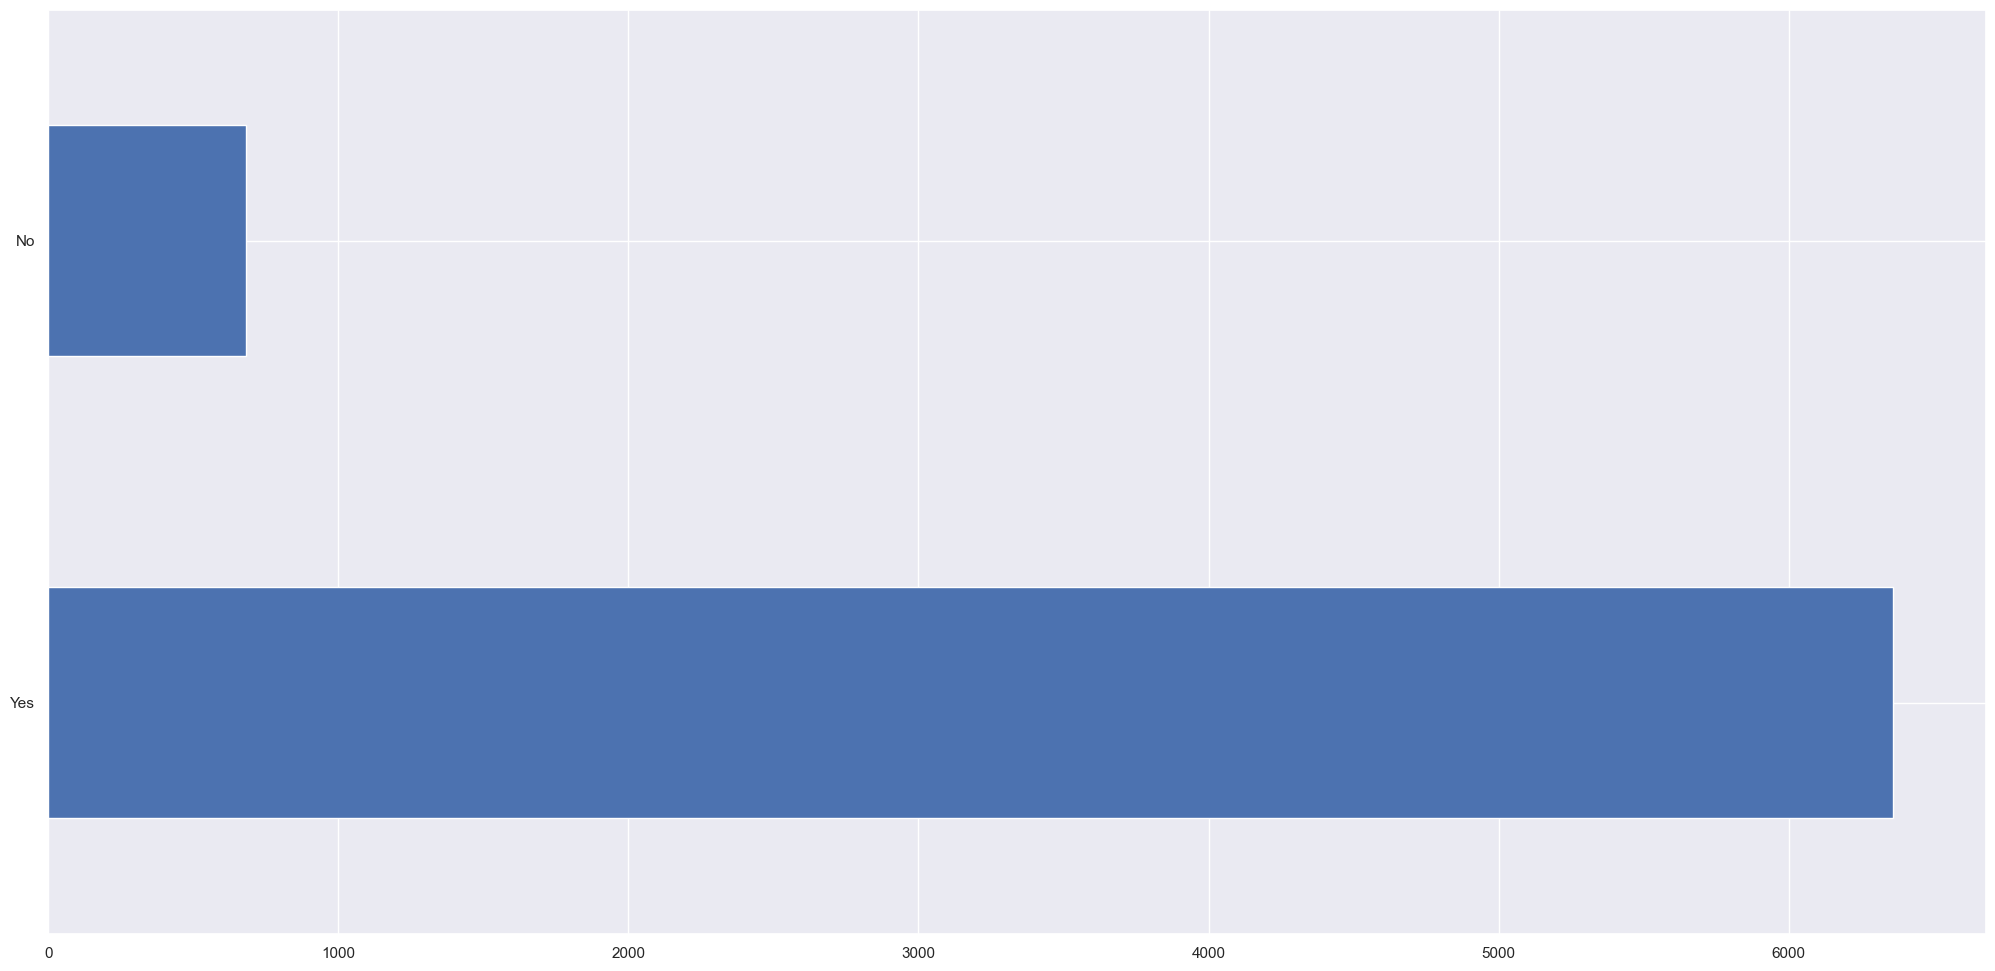

In [22]:
servicos['phoneservice'].value_counts().plot(kind='barh');

Quem são as pessoas que não possuem um serviço de celular?

### Informações dos usuarios

In [23]:
informacos_dos_usuarios = df3.loc[:, ~df3.columns.isin(dados_demograficos.columns.tolist() + servicos.columns.tolist())]

In [24]:
informacos_dos_usuarios

,tenure,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,34,One year,No,Mailed check,56.95,1889.50,0
2,2,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,45,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,2,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...
7038,24,One year,Yes,Mailed check,84.80,1990.50,0
7039,72,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,11,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,4,Month-to-month,Yes,Mailed check,74.40,306.60,1


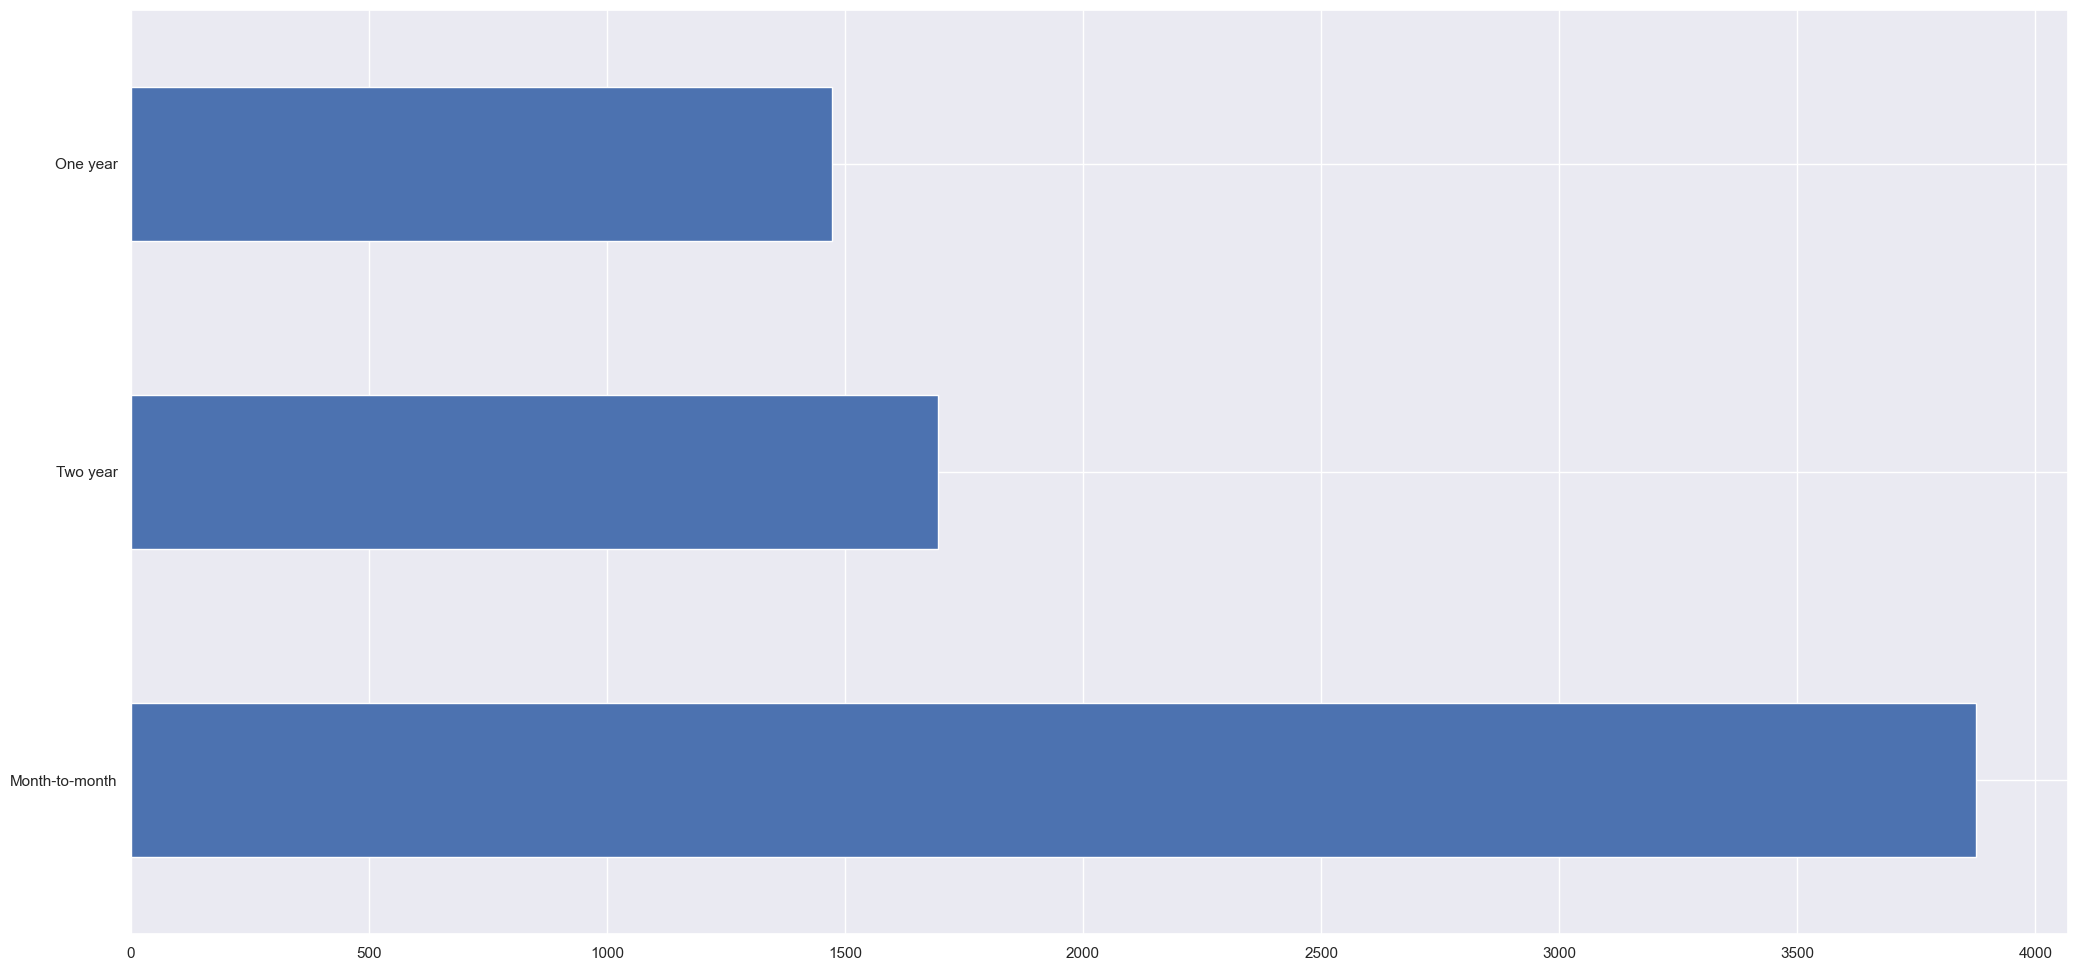

In [25]:
informacos_dos_usuarios['contract'].value_counts().plot(kind='barh');

Por que as pessoas há mais pessoas com plano de dois anos do que pessoas com um ano? 

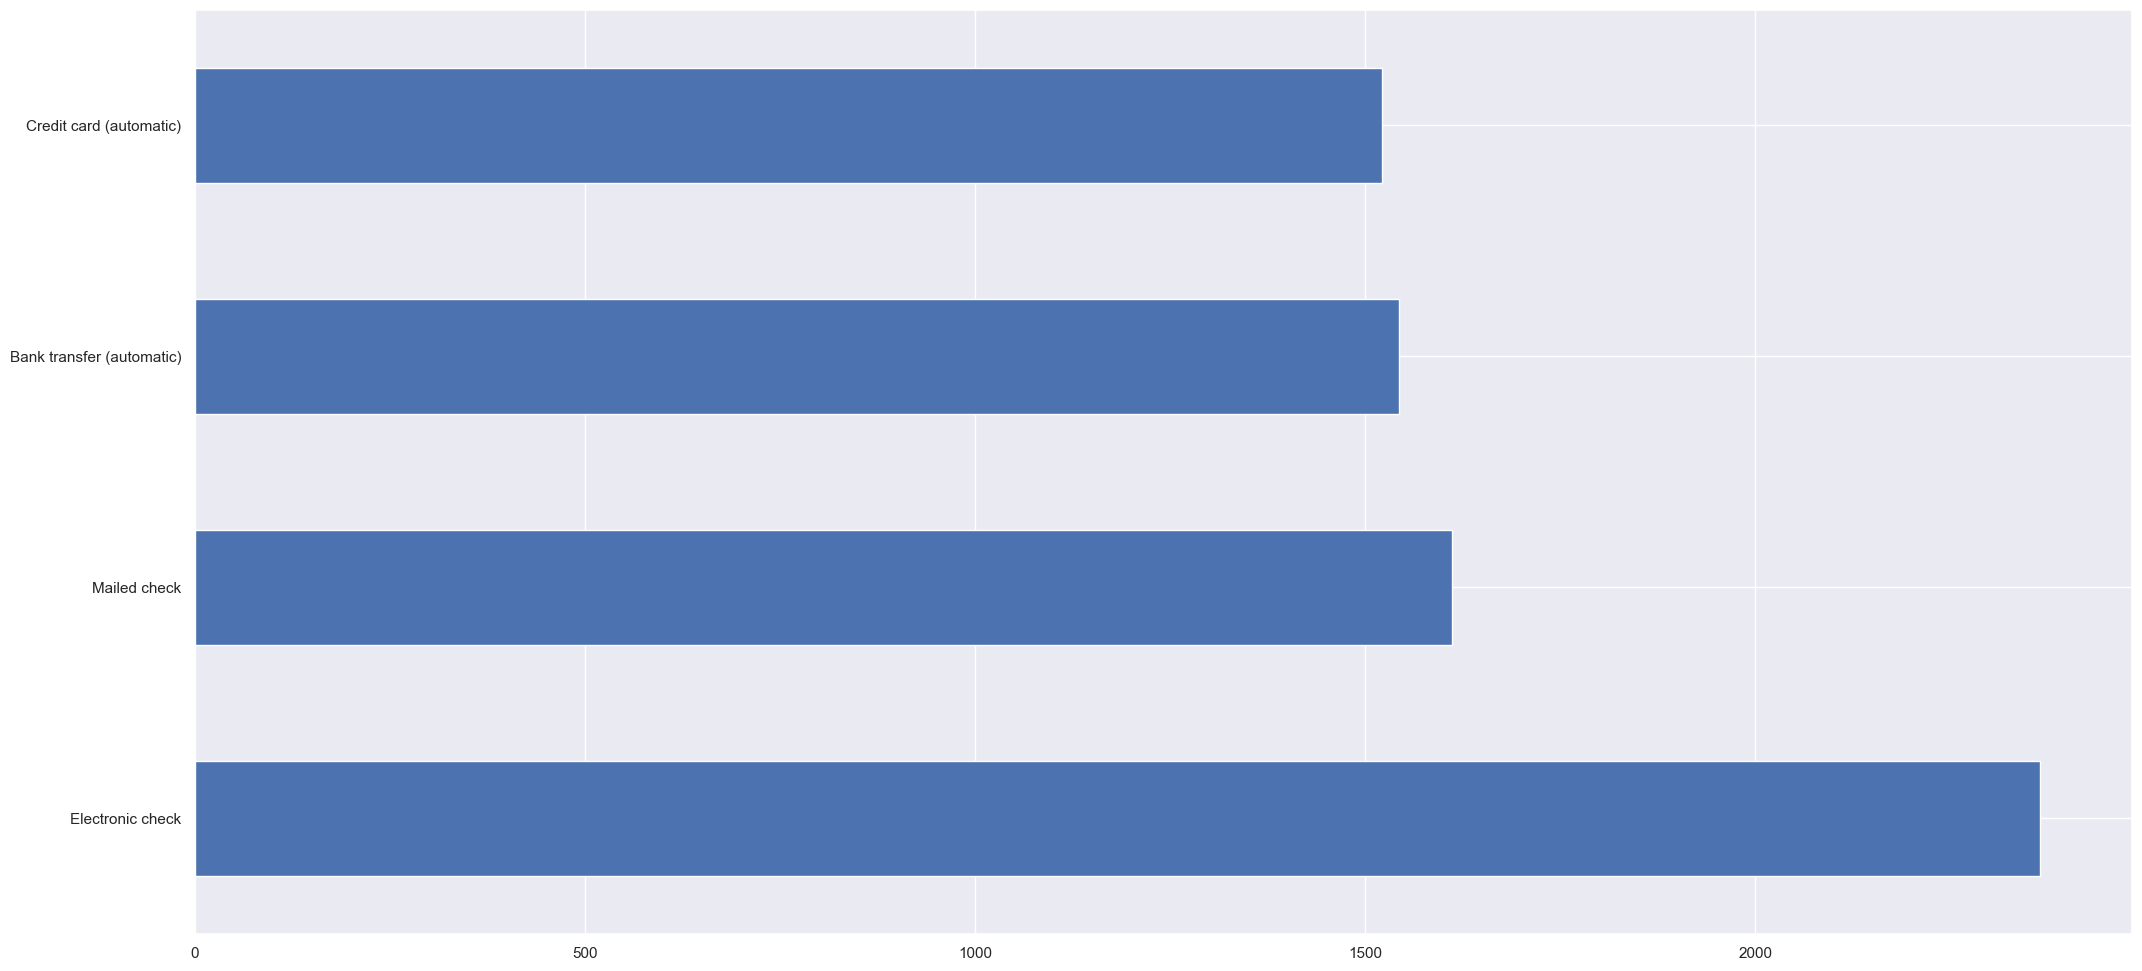

In [26]:
informacos_dos_usuarios['paymentmethod'].value_counts().plot(kind='barh');

Check Eletronico é a forma de pagamento que os clientes mais usam.

## Bivariate Analysis


In [27]:
df3.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


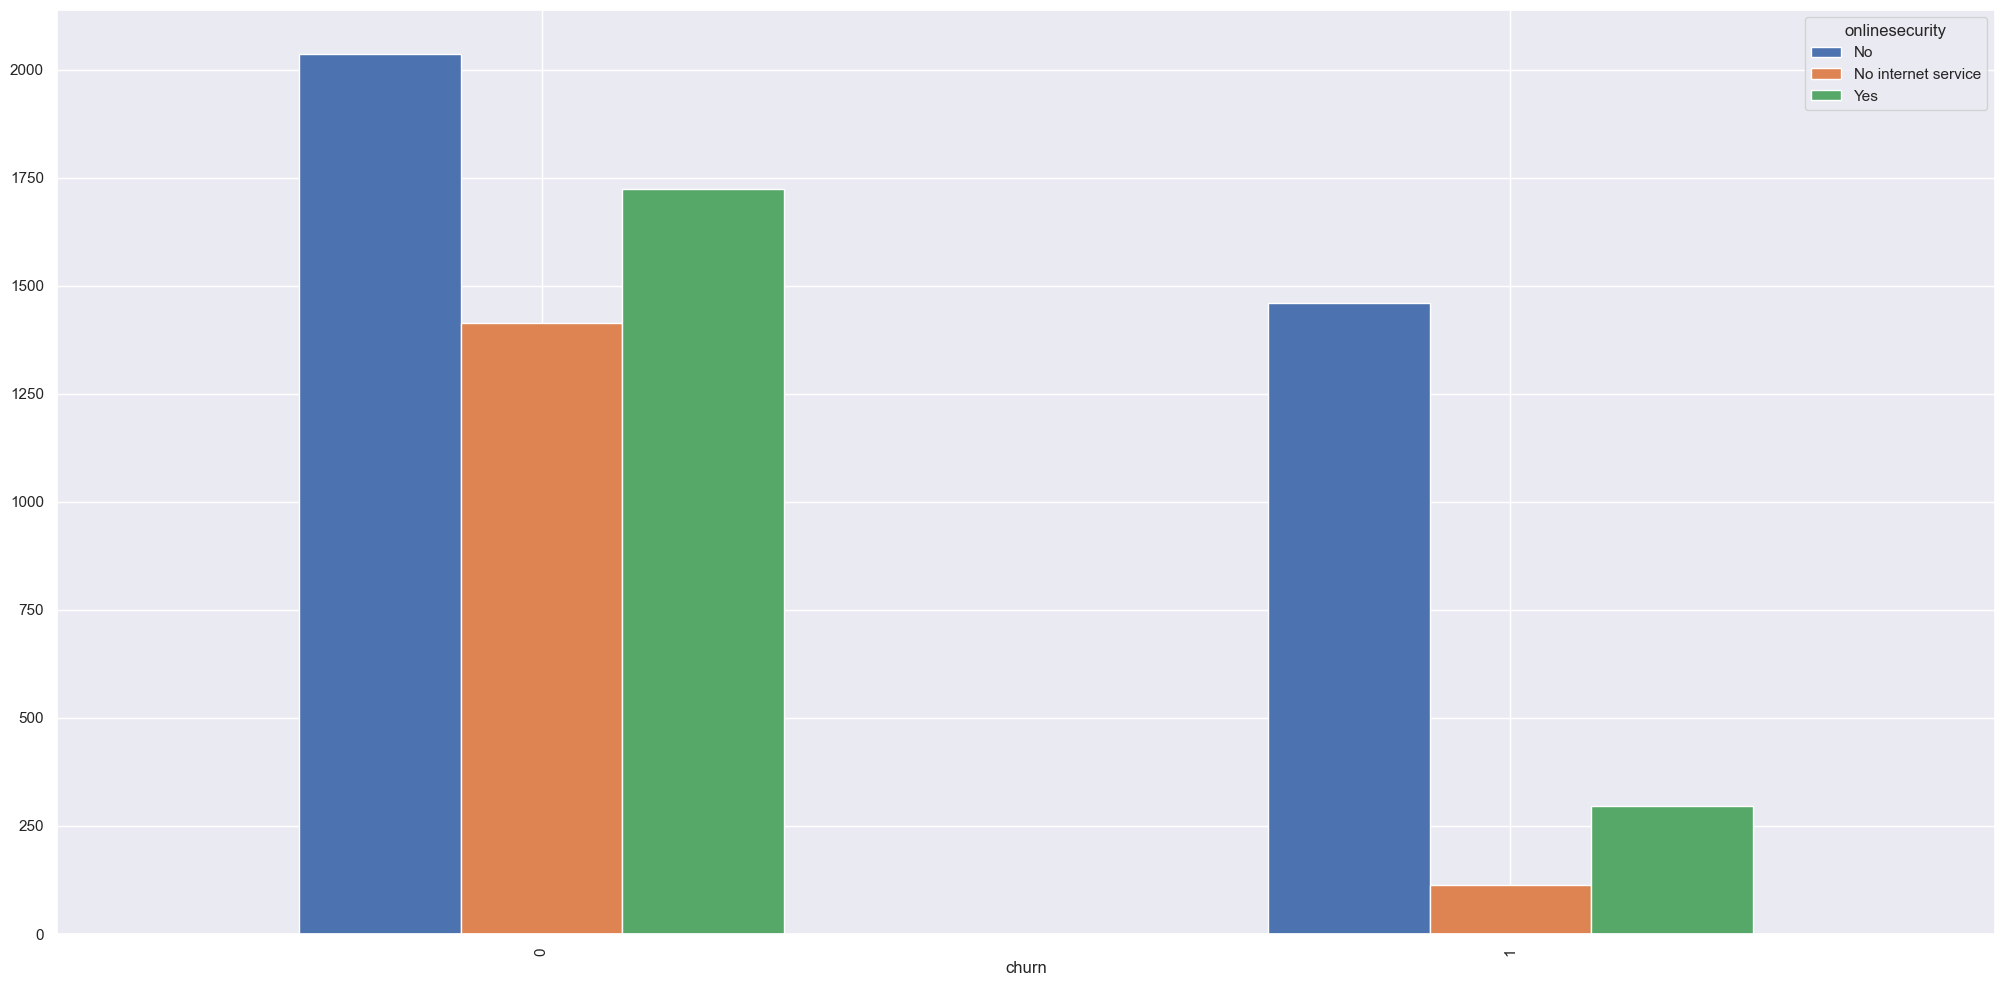

In [36]:
df3.groupby(['churn', 'onlinesecurity']).size().unstack().plot(kind='bar');

Um dos motivos do Churn é nao possuir segurança na internet? E um dos motivos de não ter Churn também é nao possuir segurança na internet?

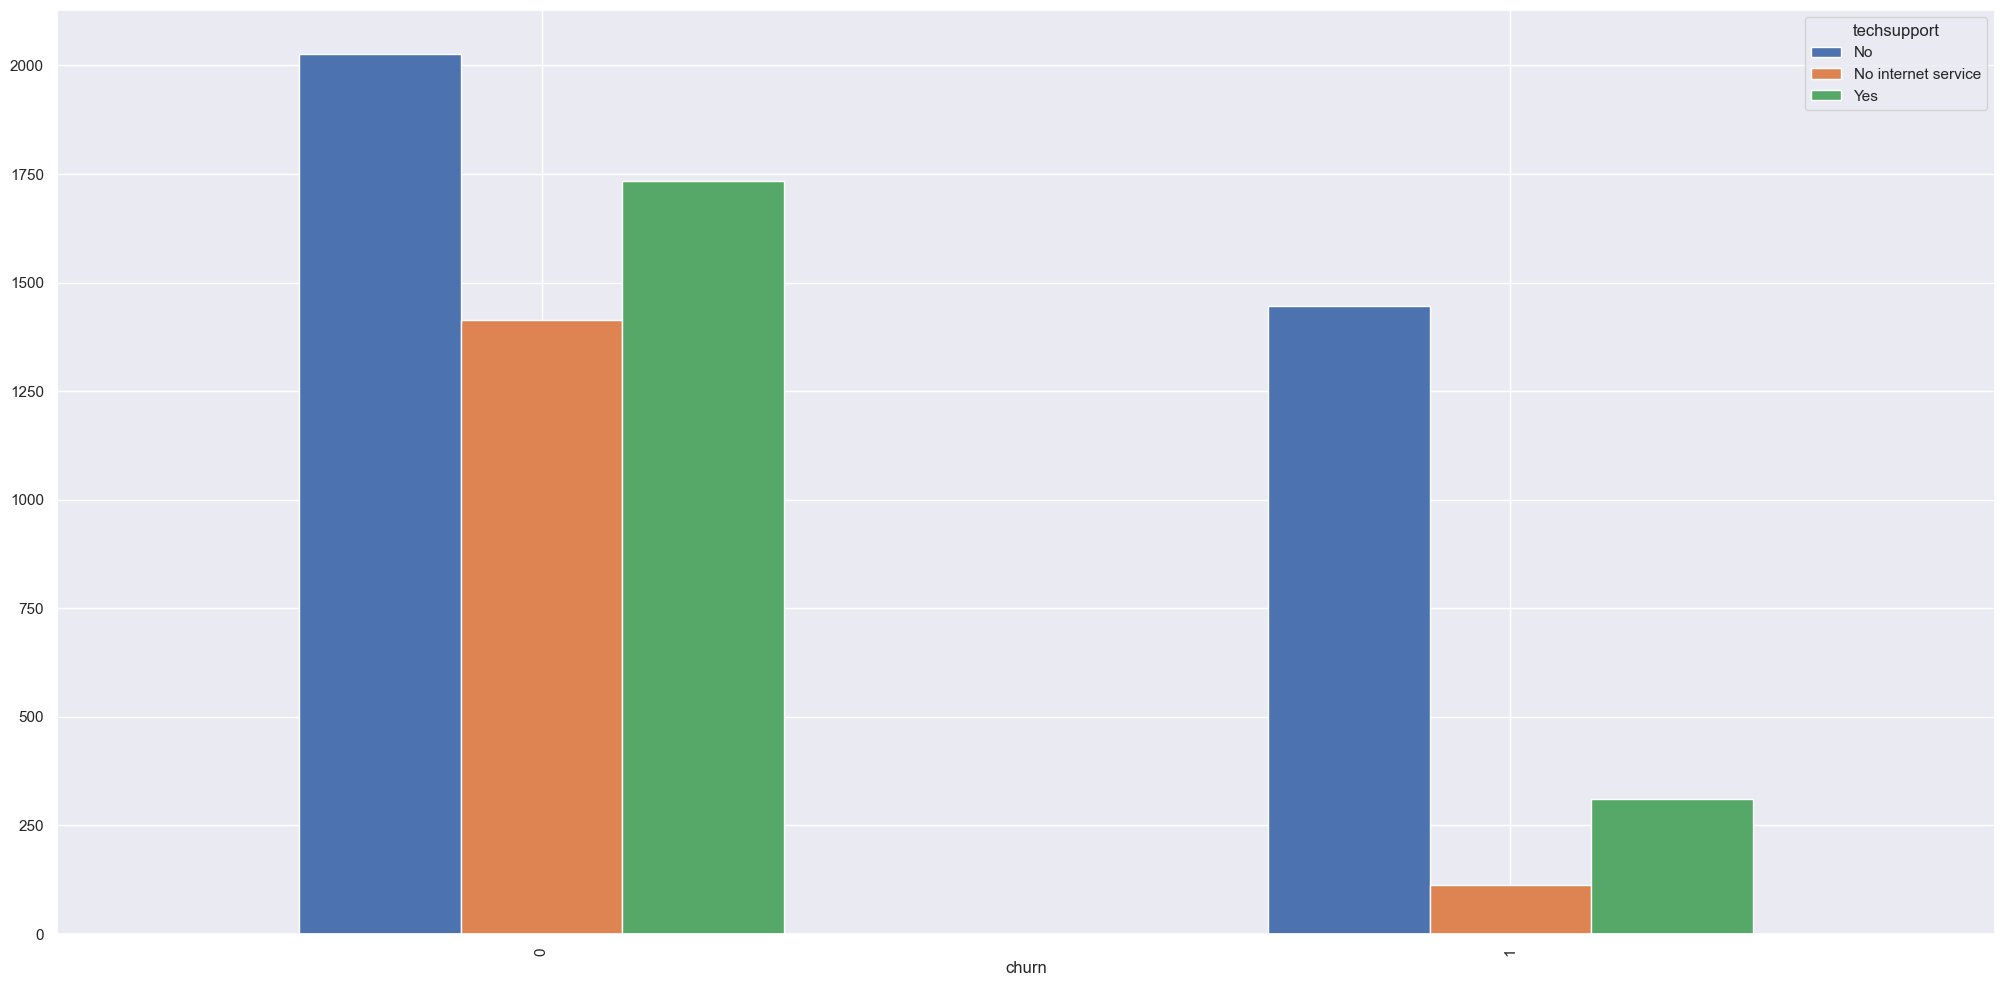

In [37]:
df3.groupby(['churn', 'techsupport']).size().unstack().plot(kind='bar');

In [42]:
df3

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


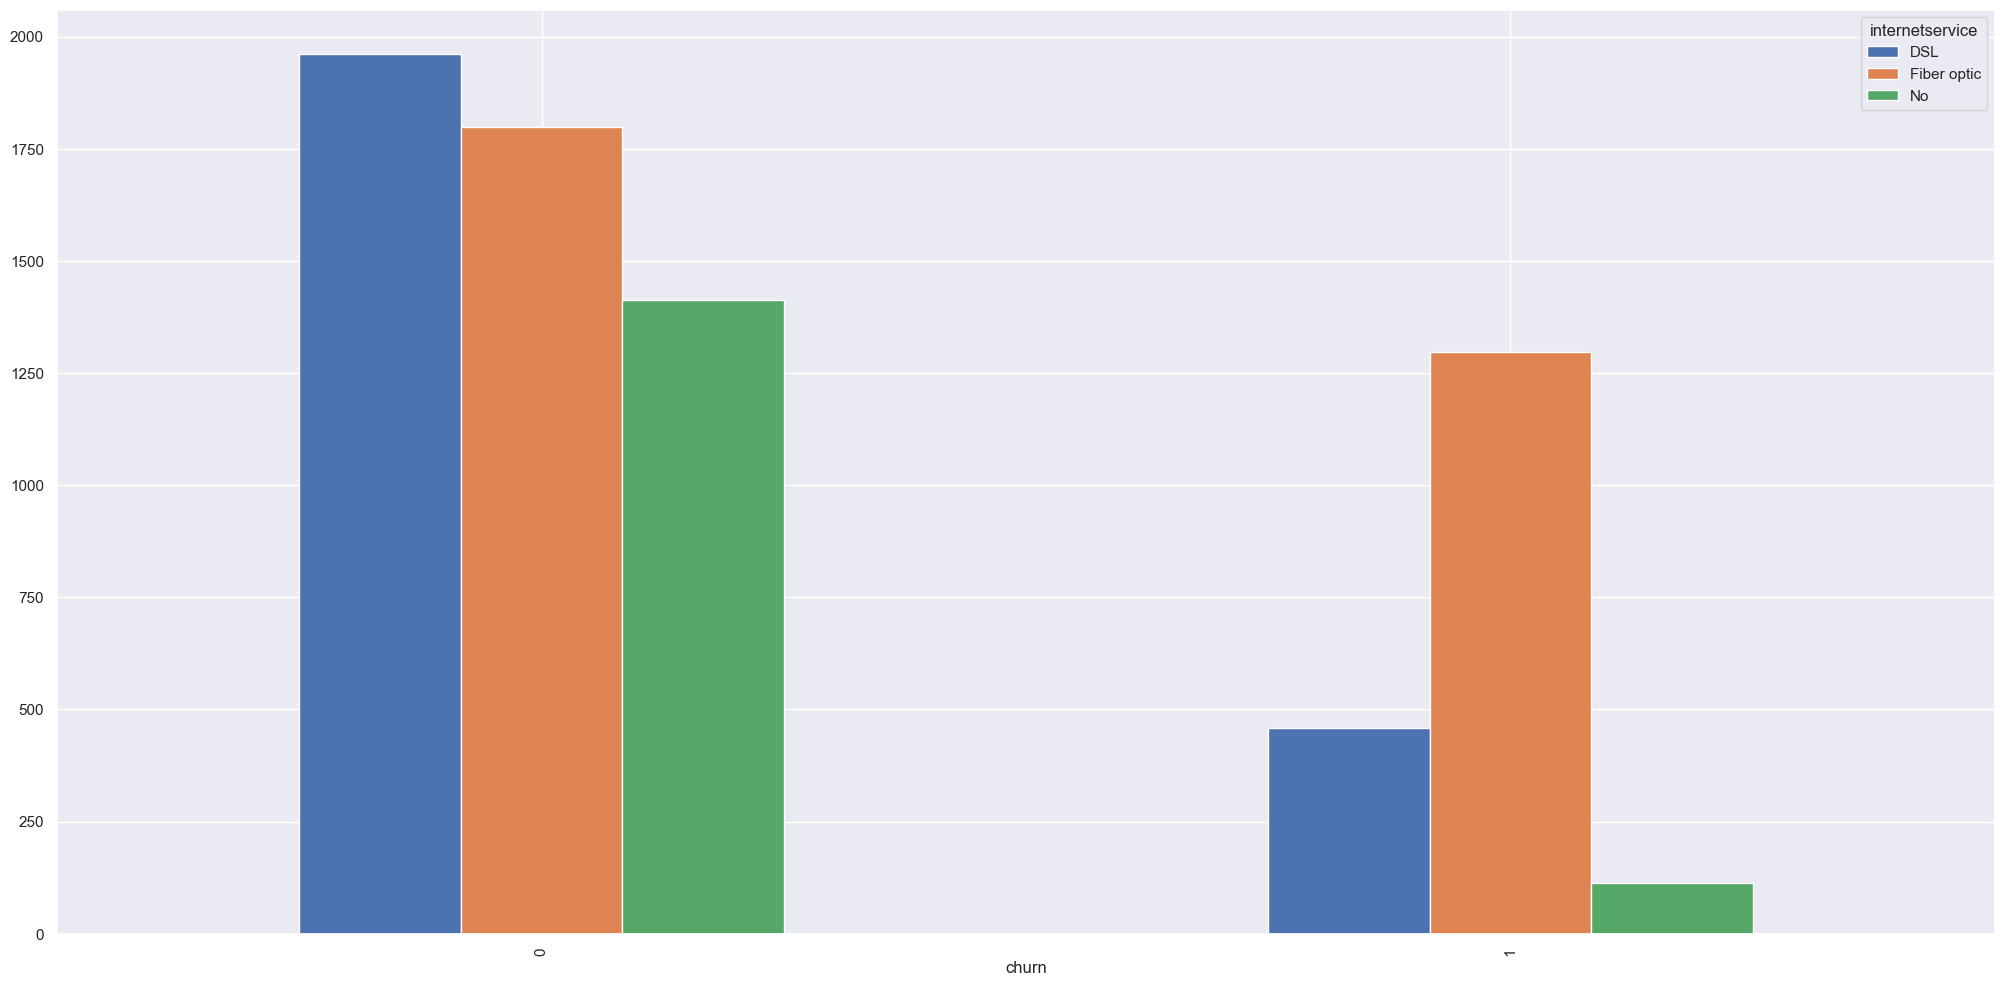

In [50]:
df3.groupby(['churn', 'internetservice']).size().unstack().plot(kind='bar');

As pessoas que não cancelaram o contrato possuem internet DSL, não usam só a internet, podem usar uma linha telefonica.

## Multivariate Analysis


### Numerical

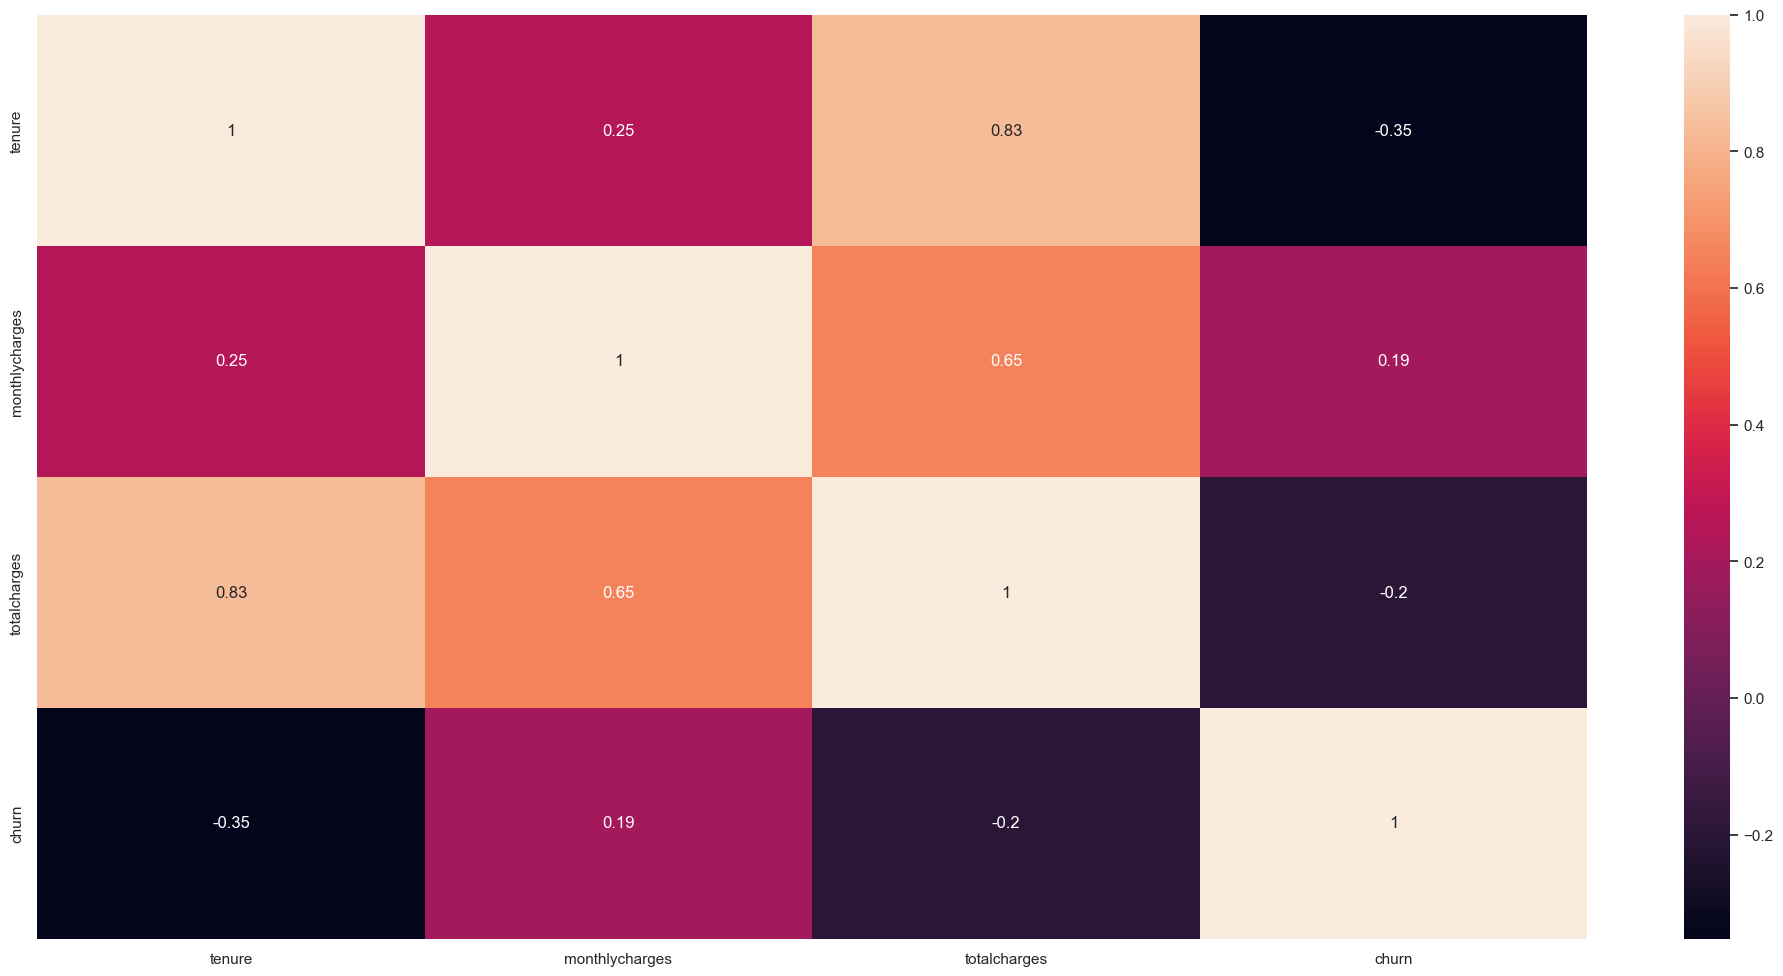

In [28]:
correlation = num_attrs.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

### Categorical

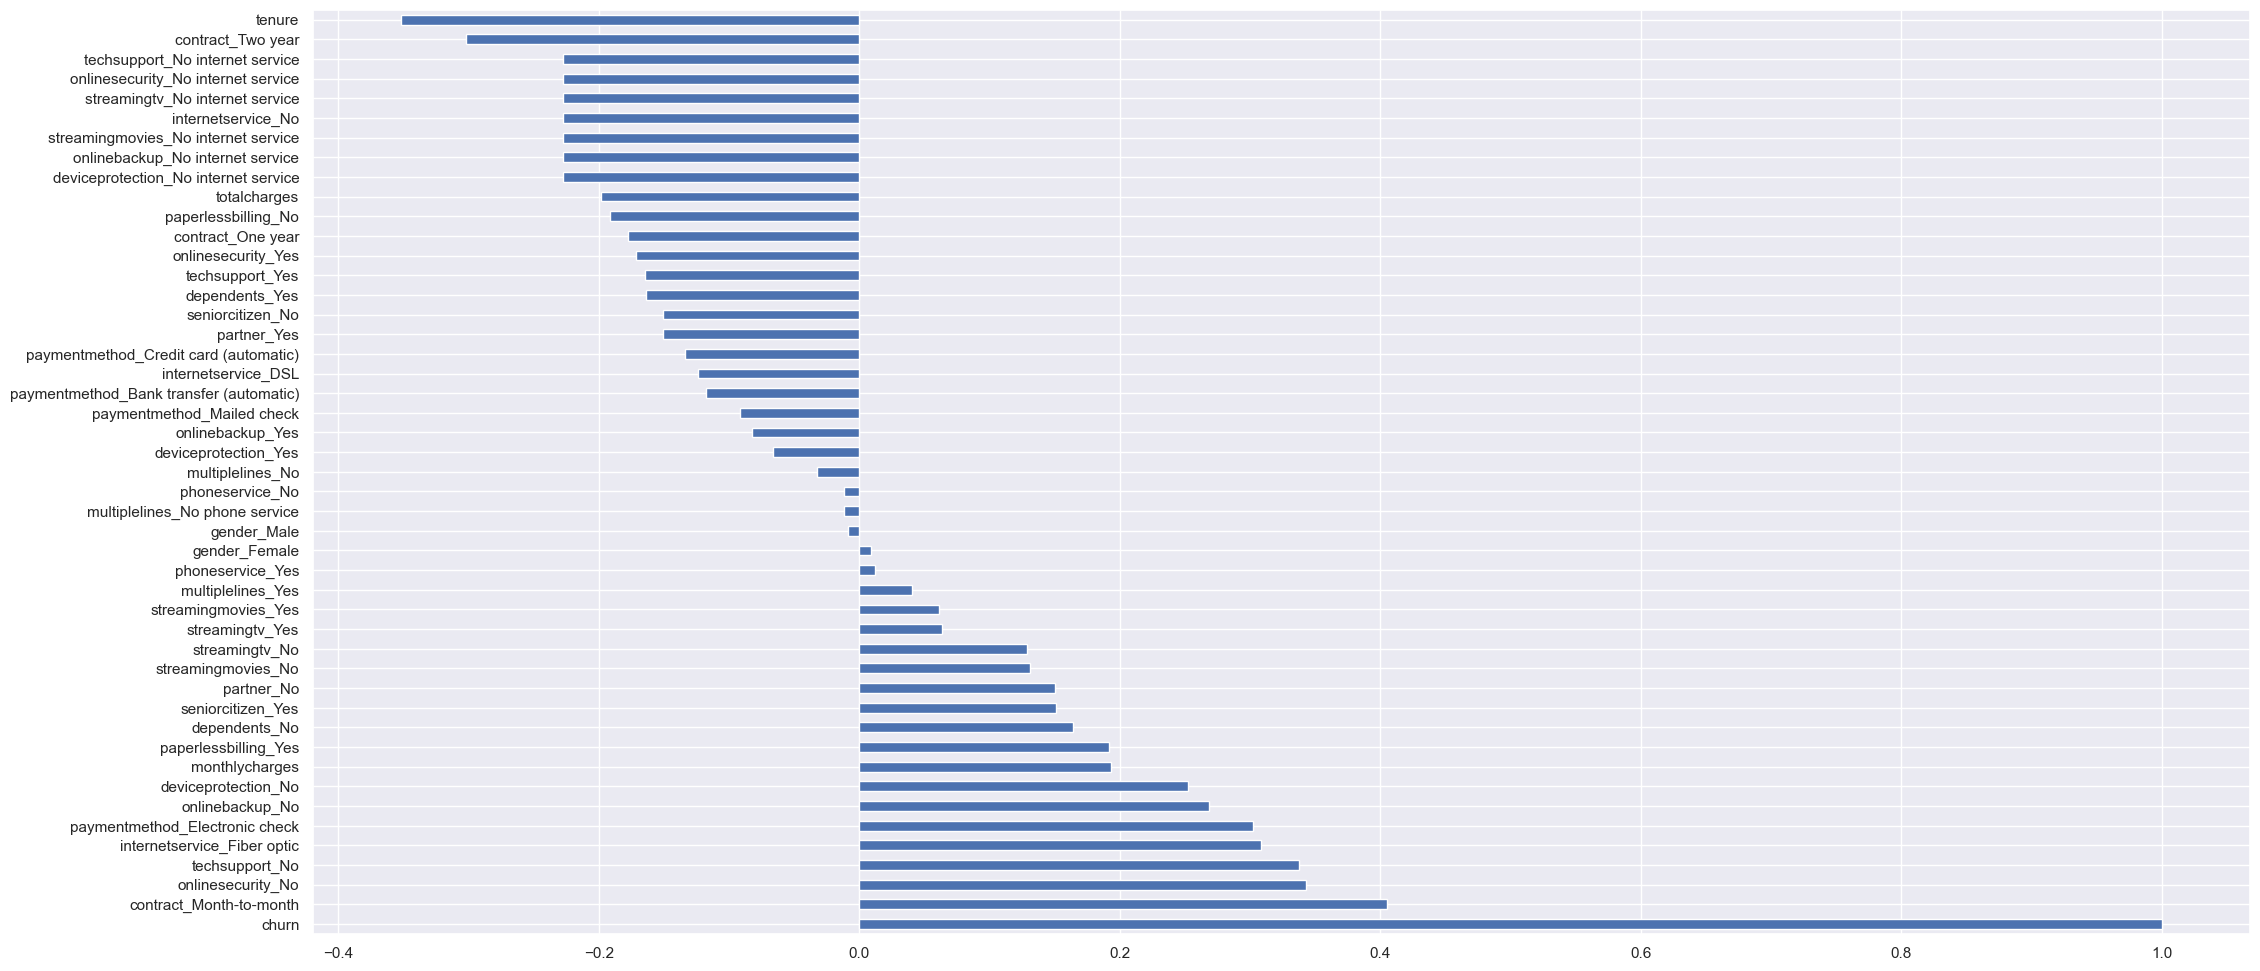

In [29]:
#plt.figure(figsize=(15, 10))
df_dummies.corr()['churn'].sort_values(ascending=False).plot(kind='barh'); 

Então, parece que contrato mes a mes tem uma correlação alta com Churn, mas não é somente a variavel contrato, tem mais 13 variaveis que tem correlação.

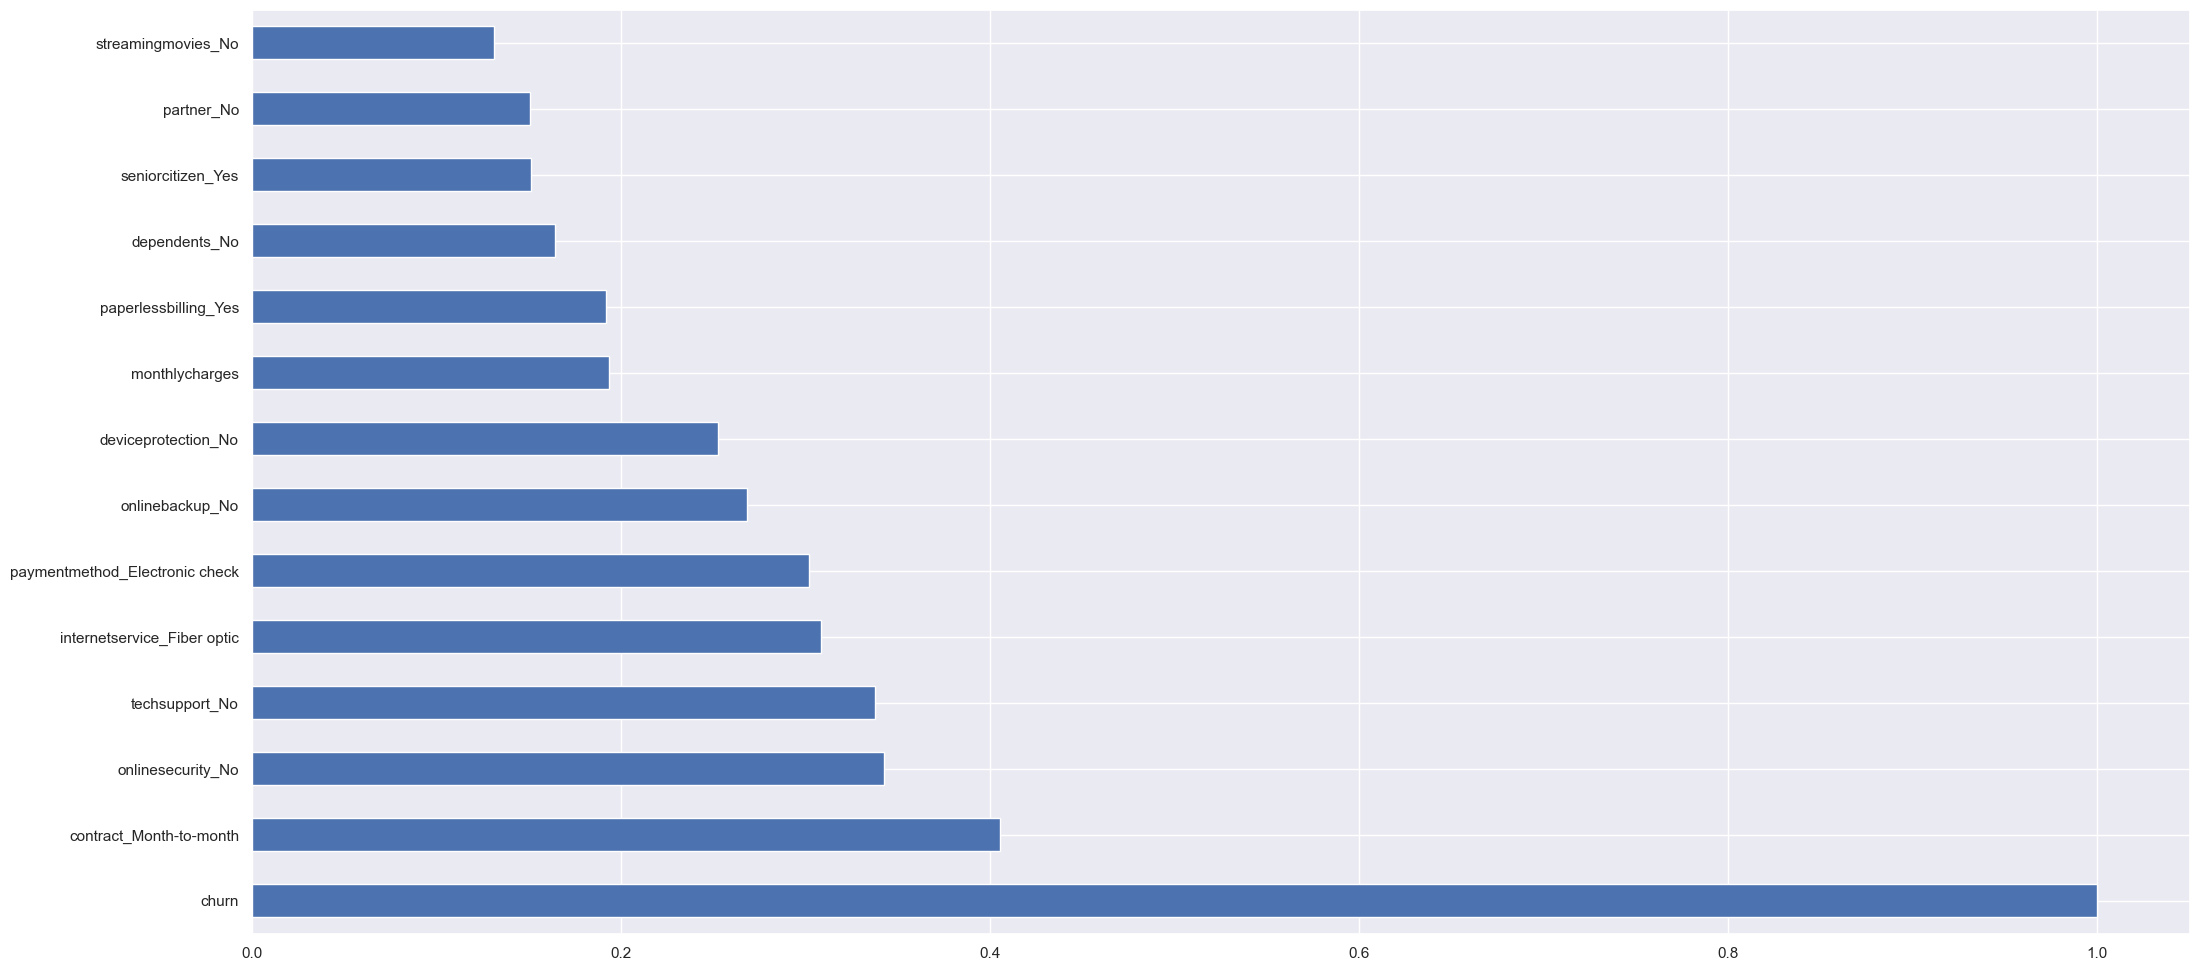

In [30]:
df_dummies.corr()['churn'].sort_values(ascending=False)[:14].plot(kind='barh'); 

Bem, um contrato mes a mes impacta no churn, nao ter segurança na internet, nao ter suporte tecnico, possuir fibra optica e pagamento em check eletronico.

# DATA PREPARATION

In [71]:
df4 = df3.copy()

## Rescaling

In [72]:
rs = RobustScaler() # 
mms = MinMaxScaler() # tenure, monthlycharges, totalcharges

In [73]:
# totalcharges
df4['totalcharges'] = rs.fit_transform( df4[['totalcharges']].values )

# tenure
df4['tenure'] = mms.fit_transform( df4[['tenure']].values )

# monthlycharges
df4['monthlycharges'] = mms.fit_transform( df4[['monthlycharges']].values )

Então, eu usei o MinMaxScaler em TotalCharges porque conhecemos o limite do montante dos usuarios, afinal, quanto maior o tenure maior o montante. O MinMaxScaler é uma boa opção.

## Transformação

In [74]:
df4 = pd.get_dummies(df4)